## Linear Regression model formula $$ŷ = intercept + slope \times x$$


## Slope formula $$slope = \frac{n \times (Σxy) - (Σx) \times (Σy)}{n(Σx^2) - (Σx)^2} $$

## y_intercept formula $$intercept = \frac{(Σy) \times (Σx^2) - (Σx) \times (Σxy)}{n \times (Σx^2) - (Σx)^2}$$

## Correlation coefficient formula for the sample $$ r = \frac{1}{n - 1} \times \Sigma(\frac{X_i - \overline{\rm X}}{Sx}) \times 
\Sigma(\frac{Y_i - \overline{\rm Y}}{Sy})$$

#### *The same formula applies to population except the denominator is n.

## Z-Score formula $$ z = \frac{X_i - \overline{\rm X}}{Sx} $$

## Implementation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


class LinearRegression:
    def __init__(self, x: np.ndarray, y: np.ndarray):
        self.x1 = x
        self.y = y

        if len(self.x1) != len(self.y):
            raise ValueError(print("The lengths of arrays are not equal. Please check."))
        self.slope = None
        self.intercept = None

    def fit(self):
        """Should calculate slope and intercept and keep on self."""
        # data count
        n = len(self.x1)

        # Finding Σx
        sum_x = sum(self.x1)

        # Finding Σy
        sum_y = sum(self.y)

        # Finding Σ(xy)
        sum_x1_times_y = sum(self.x1 * self.y)

        # Finding Σx^2
        sum_x_squared_1 = sum(self.x1 ** 2)

        # Finding (Σx)^2
        sum_x_squared_2 = sum_x ** 2

        def calculate_slope():
            numerator = (n * sum_x1_times_y) - (sum_x * sum_y)
            denominator = n * sum_x_squared_1 - sum_x_squared_2
            slope = numerator / denominator
            return slope

        def calculate_intercept():
            numerator = (sum_y * sum_x_squared_1) - (sum_x * sum_x1_times_y)
            denominator = n * sum_x_squared_1 - sum_x_squared_2
            y_intercept = numerator / denominator
            return y_intercept

        self.slope = calculate_slope()
        self.intercept = calculate_intercept()

    def draw_scatter_plot(self):
        plt.figure(figsize=(15, 10))
        plt.xlabel('x_1')
        plt.ylabel('y')
        plt.title('Dependency plot')
        plt.scatter(self.x1, self.y, edgecolors='green')

    def predict(self, x_value):
        """Given the x value predicts the y value."""
        return self.slope * x_value + self.intercept

    def draw_regression_line(self):
        """Fitting the line of the model."""
        self.draw_scatter_plot()
        predicted_values = [self.predict(x) for x in self.x1]
        plt.plot(self.x1, predicted_values)
        plt.xlabel('x1')
        plt.ylabel('predicted_y')
        plt.show()

    def correlation_coefficient(self):
        # Calculating the mean of the x1 and y
        x_mean = np.mean(self.x1)
        y_mean = np.mean(self.y)

        # Calculating the standard deviation of x1 and y
        x_st_dev = np.std(self.x1)
        y_st_dev = np.std(self.y)

        x_part = np.array([(x - x_mean) / x_st_dev for x in self.x1])
        y_part = np.array([(y - y_mean) / y_st_dev for y in self.y])

        numerator = sum(x_part * y_part)
        denominator = len(self.x1)

        correlation_coefficient = numerator / denominator
        return correlation_coefficient

    def r_squared(self):
        return self.correlation_coefficient() ** 2

    def __repr__(self):
        return ('Regression model is {} = {}x + {}\nCorrelation coefficient is {}\n'
                'R-squared is {}\nDraw the regression line '
                'using draw_regression_line function.').format('ŷ',
                                                               round(self.slope, 3),
                                                               round(self.intercept(),
                                                                     3),
                                                               self.correlation_coefficient(),
                                                               self.r_squared())
    

In [2]:
data = pd.read_csv("/home/samvel/Desktop/Linear Regression/data.csv")
x_axis = data['x_1'].values
y_axis = data['y'].values

In [3]:
model = LinearRegression(x_axis, y_axis)

In [4]:
model.fit()

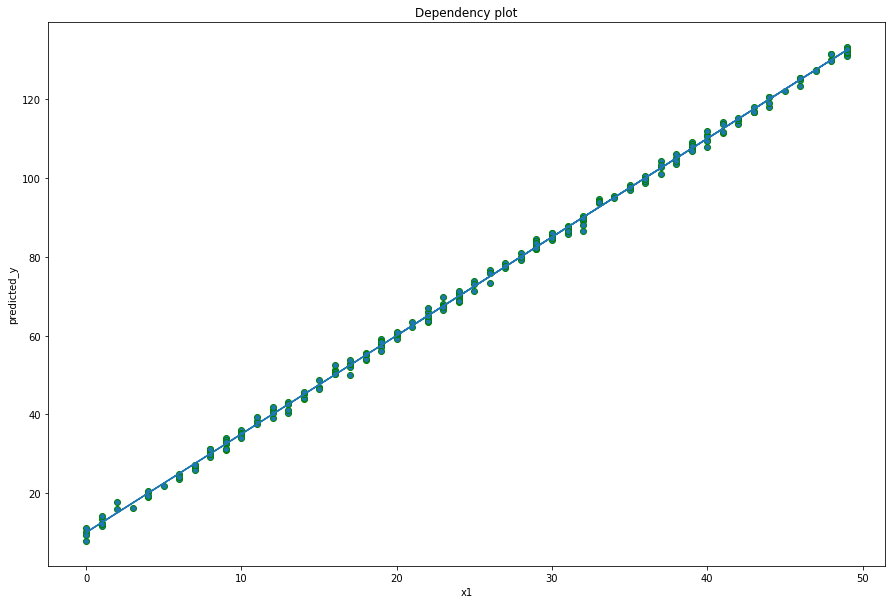

In [5]:
model.draw_regression_line()